https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

# loading and handling time series in pandas

## __0.__import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## __1.__load the data set

In [5]:
data = pd.read_csv('AirPassengers.csv')

show the inital rows and data types of the columns

In [7]:
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


## __2.__read the data as a time series: special __arguments__

In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

__parse_dates__: specify which column contains date-time information

__index_col__: use which column as index

__date_parser__: function to convert string into datetime variable

In [11]:
print(data.head())
print('\n Data Types:')
print(data.dtypes)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

 Data Types:
#Passengers    int64
dtype: object


In [12]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

__datetime64[ns]__: datetime object

In [14]:
type(data)

pandas.core.frame.DataFrame

## __3.__convert the column into a series

In [15]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

## __4.__select particlular value in a series

### __4.1.__specific index as a string

In [16]:
ts['1949-01-01']

112

### __4.2.__import __datetime__ and use '__datetime__' function

In [17]:
from datetime import datetime

In [18]:
ts[datetime(1949,1,1)]

112

## __5.__select particular month

### __5.1.__specify entire range

In [19]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

### __5.2.__slice notation__:__

__end is included!!!__

In [21]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

### __5.3.__year or month

In [22]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# check stationarity of a time series

## 6.plot the data

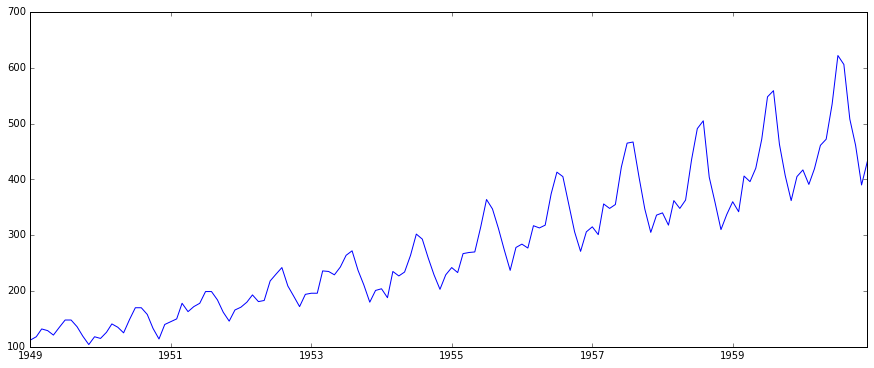

In [23]:
plt.plot(ts)

## 7.check stationarity

### __7.1.__plotting rolling statistics
### __7.2.Dickey-Fuller Test__

In [24]:
from statsmodels.tsa.stattools import adfuller

In [29]:
def test_stationary(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

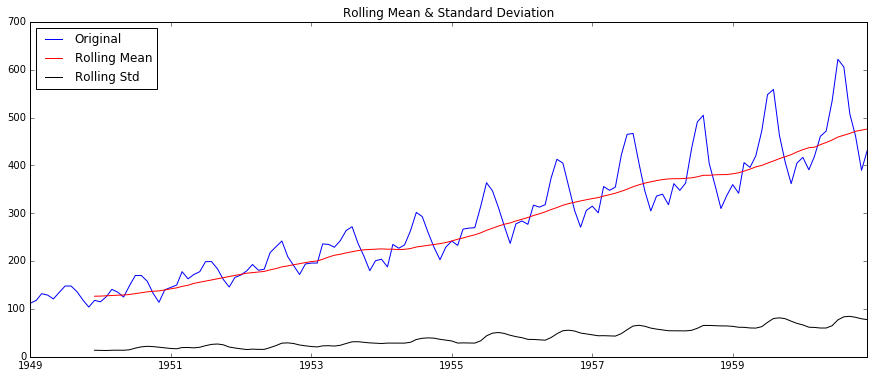

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64


In [30]:
test_stationary(ts)

# to make a time series stationary

2 major reasons for non-stationary:

__1.__trend

__2.__seasonality

## 8.estimating & eliminating trend

### 8.1.transformation

transformation: penalize higher values than smaller values

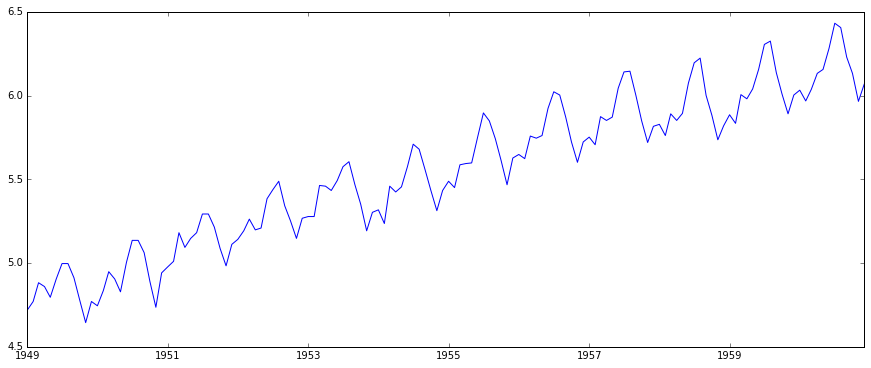

In [31]:
ts_log = np.log(ts)
plt.plot(ts_log)

### 8.2.estimate or model trend

__1.aggregation__: average for a period

__2.smoothing__: rolling average

__3.polynomial fitting__: fit a regression model

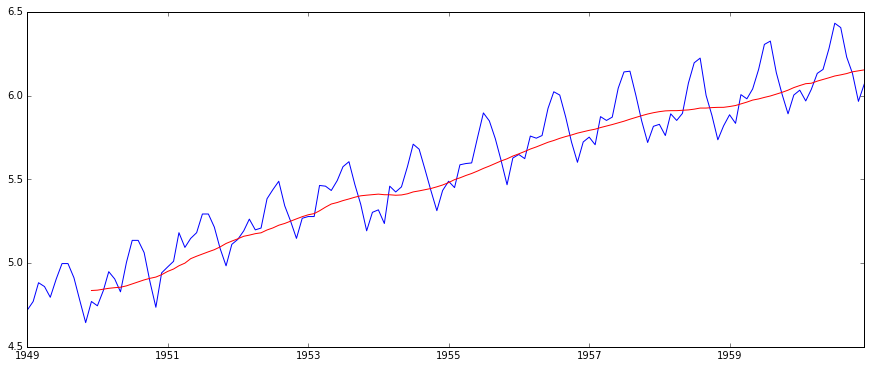

In [32]:
moving_avg = ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

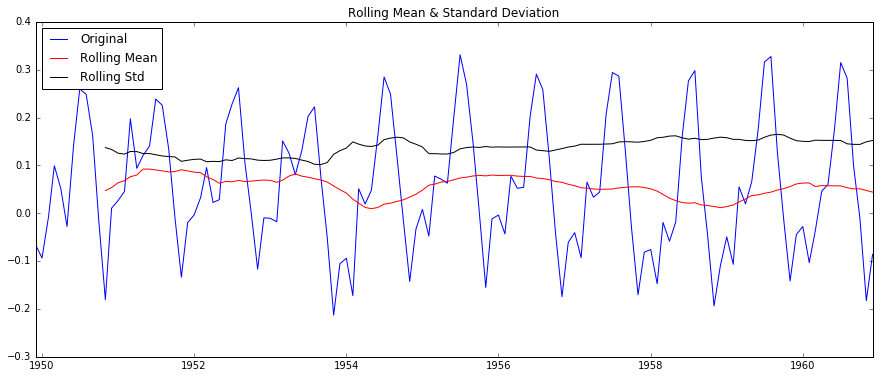

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (10%)            -2.579896
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
dtype: float64


In [34]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationary(ts_log_moving_avg_diff)

__exponentially weighted moving average__

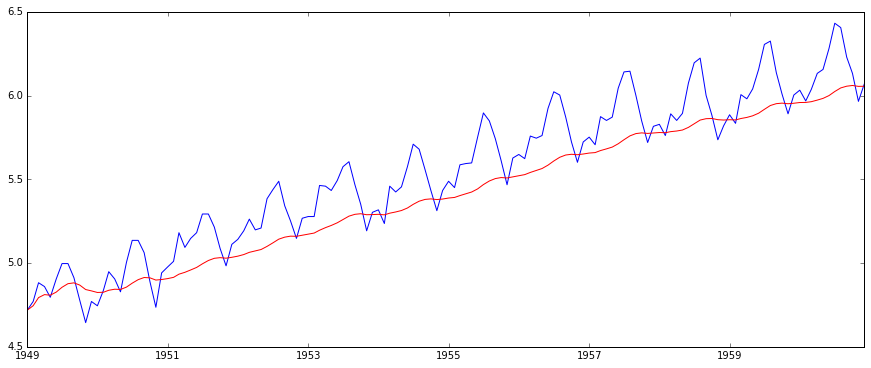

In [40]:
expweighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

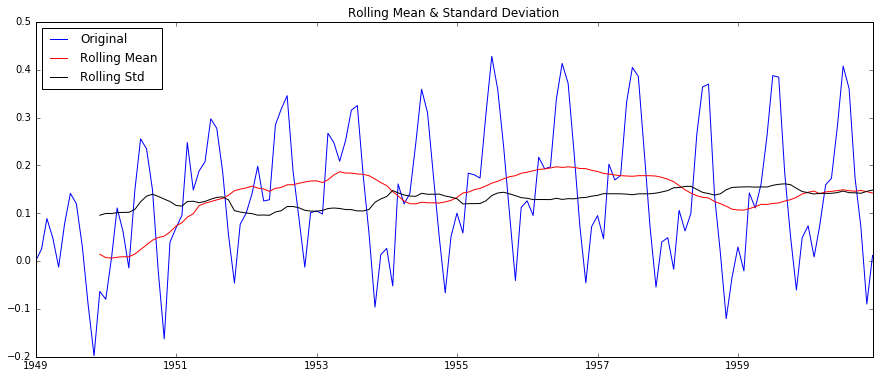

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64


In [41]:
ts_log_ewm_diff = ts_log - expweighted_avg
test_stationary(ts_log_ewm_diff)

### 8.3.eliminating trend and seasonality

__1.differencing__

__2.decomposition__

#### 8.3.1.differencing

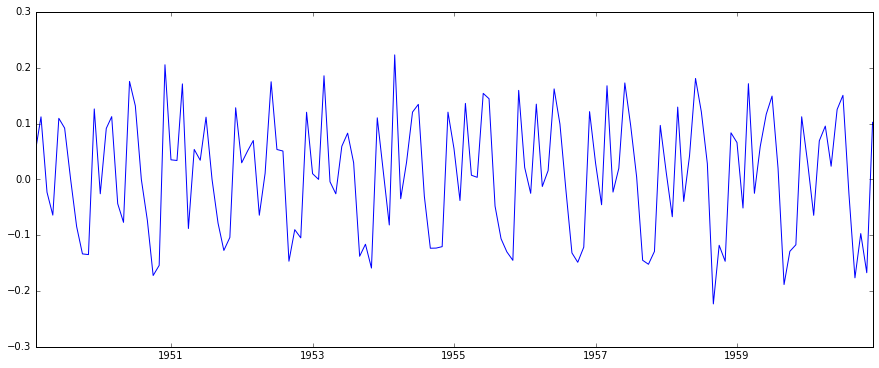

In [42]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

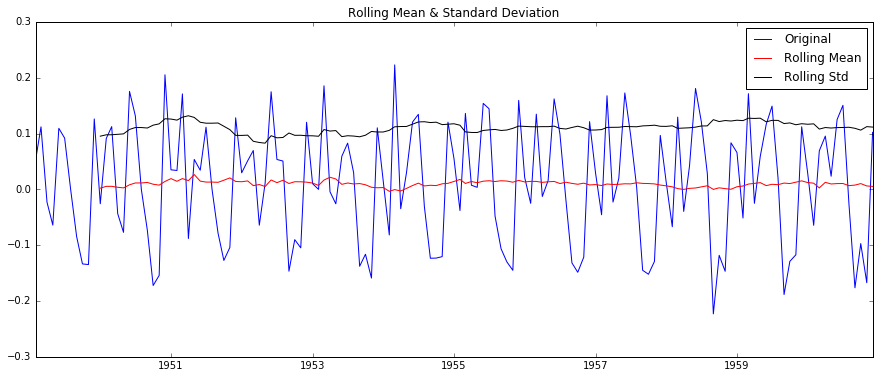

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (10%)            -2.578960
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
dtype: float64


In [43]:
ts_log_diff.dropna(inplace=True)
test_stationary(ts_log_diff)

#### 8.3.2.Decomposing

trend & seasonality seperate

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

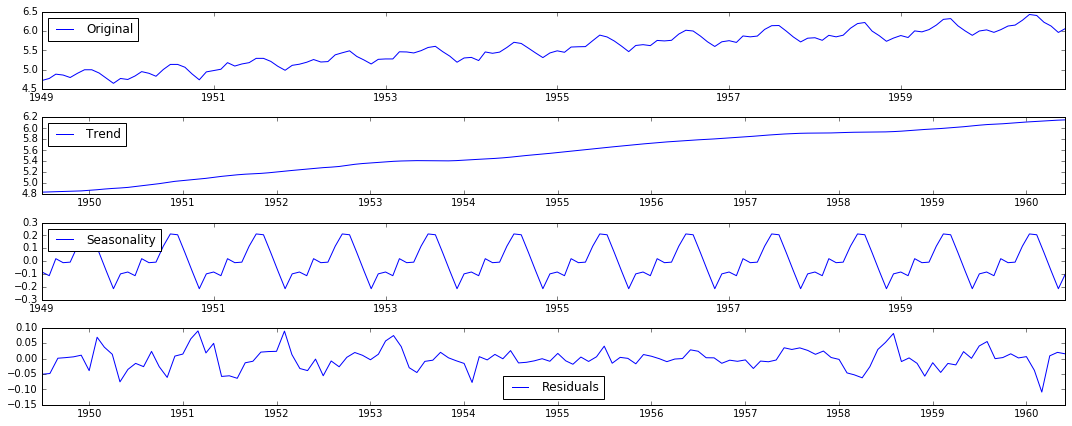

In [46]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

check stationarity of residuals

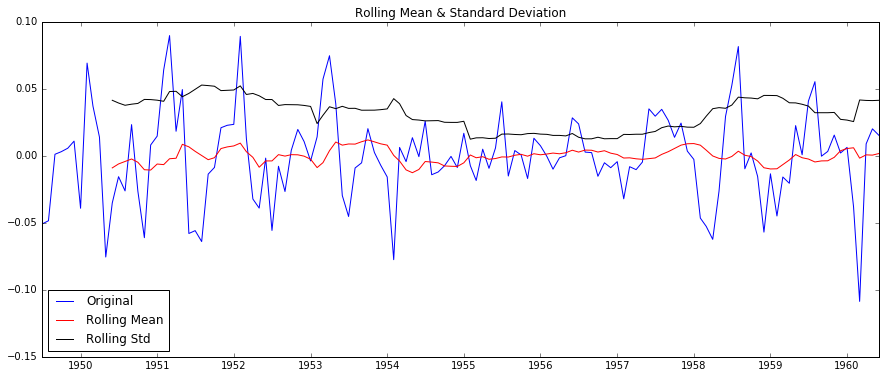

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (10%)          -2.579569e+00
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
dtype: float64


In [47]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationary(ts_log_decompose)

# forecasting a time series

after trend and seasonality estimation:

__1.strictly staionary series__: residuals as white noise

__2.dependence among values__: models(ARIMA,etc) to forecast data